# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##Observable Trends:

#1 There doesn't seem to be any correlation between latitude and cloudiness, and wind speed.
#2 Tempature goes up the closer you get to the equator, spiking closer to latitude 20.
#3 Humidity, is a weak correlation, but it seems to get higher closer to the equator.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import openweathermapy as ow
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
#!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
#Build dataframe to put the information pulled from the API
cities_df=pd.DataFrame(cities)
cities_df.columns=["City"]
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Wind Speed']=""

#view dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,,,,,,,,
1,puerto ayora,,,,,,,,
2,alihe,,,,,,,,
3,qaanaaq,,,,,,,,
4,necochea,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set the units and the API key
settings = {"units": "imperial", "appid": api_key}

#API calls for each city
for index, row in cities_df.iterrows():
    
    try: 
        weather_data = ow.get_current(row['City'], **settings)
        
        print(f"Processing Record {(index+1)%50} of Set {(index+1)//50+1} | {cities[index]}")
        
        cities_df.loc[index,'Cloudiness'] = weather_data['clouds']['all']
        cities_df.loc[index, 'Country'] = weather_data['sys']['country']
        cities_df.loc[index, 'Date'] = weather_data['dt']
        cities_df.loc[index, 'Humidity'] = weather_data['main']['humidity']
        cities_df.loc[index, 'Lat'] = weather_data['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_data['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_data['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = weather_data['wind']['speed']

    #if not found, then skip   
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | alihe
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | ambilobe
Processing Record 7 of Set 1 | suraabad
Processing Record 8 of Set 1 | avarua
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | walvis bay
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ban nahin
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | port macquarie
Processing Record 21 of Set 1 | beyneu
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | vallenar
Processing Record 24 of Set 1 | bethel
Processing Record 25 of

Processing Record 7 of Set 5 | paamiut
Processing Record 8 of Set 5 | sao paulo de olivenca
Processing Record 9 of Set 5 | zhezkazgan
City not found. Skipping...
Processing Record 11 of Set 5 | lakes entrance
Processing Record 12 of Set 5 | lesnoy
Processing Record 13 of Set 5 | nautla
Processing Record 14 of Set 5 | blairmore
Processing Record 15 of Set 5 | dickinson
Processing Record 16 of Set 5 | twin falls
Processing Record 17 of Set 5 | arman
Processing Record 18 of Set 5 | mehamn
Processing Record 19 of Set 5 | bambous virieux
Processing Record 20 of Set 5 | college
Processing Record 21 of Set 5 | srednekolymsk
Processing Record 22 of Set 5 | bontang
Processing Record 23 of Set 5 | port-gentil
Processing Record 24 of Set 5 | kavieng
Processing Record 25 of Set 5 | isangel
Processing Record 26 of Set 5 | ulladulla
Processing Record 27 of Set 5 | vila franca do campo
Processing Record 28 of Set 5 | cotonou
Processing Record 29 of Set 5 | hobart
City not found. Skipping...
Processin

Processing Record 10 of Set 9 | kloulklubed
Processing Record 11 of Set 9 | northam
Processing Record 12 of Set 9 | ambunti
Processing Record 13 of Set 9 | port keats
Processing Record 14 of Set 9 | alice springs
Processing Record 15 of Set 9 | pinega
Processing Record 16 of Set 9 | lagunas
Processing Record 17 of Set 9 | araouane
Processing Record 18 of Set 9 | vilyuysk
Processing Record 19 of Set 9 | fare
Processing Record 20 of Set 9 | whitehorse
Processing Record 21 of Set 9 | puerto el triunfo
Processing Record 22 of Set 9 | kabo
Processing Record 23 of Set 9 | buala
Processing Record 24 of Set 9 | ongandjera
Processing Record 25 of Set 9 | tahoua
Processing Record 26 of Set 9 | san ramon de la nueva oran
City not found. Skipping...
Processing Record 28 of Set 9 | loandjili
Processing Record 29 of Set 9 | dimitrovgrad
Processing Record 30 of Set 9 | burns lake
Processing Record 31 of Set 9 | chipinge
Processing Record 32 of Set 9 | zhangye
Processing Record 33 of Set 9 | kurchum
C

In [5]:
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,75,MX,1563305276,58,22.89,-109.91,95,6.93
1,puerto ayora,20,EC,1563305311,51,-0.74,-90.35,80.6,21.92
2,alihe,64,CN,1563305494,93,50.57,123.73,56.93,2.59
3,qaanaaq,76,GL,1563305341,52,77.48,-69.36,45.91,1.81
4,necochea,100,AR,1563305495,70,-38.55,-58.74,54,7
5,ambilobe,0,MG,1563305495,71,-13.19,49.05,70.07,8.48
6,suraabad,0,AZ,1563305496,83,40.82,49.47,75.2,9.17
7,avarua,100,CK,1563305496,69,-21.21,-159.78,73.4,12.75
8,taolanaro,,,,,,,,
9,punta arenas,75,CL,1563305307,70,-53.16,-70.91,42.8,18.34


In [6]:
#Save to a CSV
cities_df.to_csv("cities_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

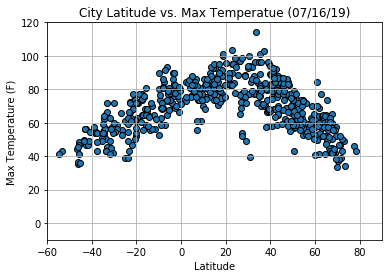

In [8]:
#Plot the lat vs temp
latitude=pd.to_numeric(cities_df.Lat)
temperature=pd.to_numeric(cities_df['Max Temp'])

#plot the scatter plot
plt.scatter(latitude,temperature,edgecolor='k')

#Set the limits and labels
plt.grid()
plt.xlim([-60, 90])
plt.ylim([-10, 120])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperatue (07/16/19)")

#Save the figure
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

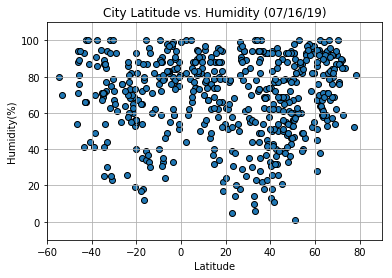

In [9]:
#Plot the lat vs humidity
latitude=pd.to_numeric(cities_df.Lat)
humidity=pd.to_numeric(cities_df['Humidity'])

#plot the scatter plot
plt.scatter(latitude,humidity,edgecolor='k')

#Set the limits and labels
plt.grid()
plt.xlim([-60, 90])
plt.ylim([-10, 110])
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (07/16/19)")

#Save the figure
plt.savefig("lat_vs_hum.png")

#### Latitude vs. Cloudiness Plot

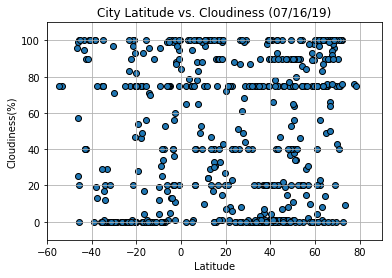

In [10]:
#Plot lat vs Cloudiness
latitude=pd.to_numeric(cities_df.Lat)
cloud=pd.to_numeric(cities_df['Cloudiness'])

#plot the scatter plot
plt.scatter(latitude,cloud,edgecolor='k')

#Set the limits and labels
plt.grid()
plt.xlim([-60, 90])
plt.ylim([-10, 110])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (07/16/19)")

#Save the figure
plt.savefig("lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

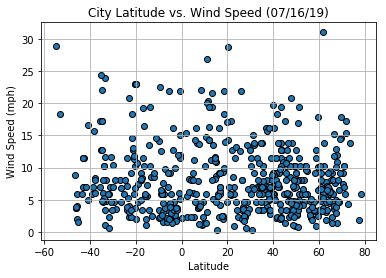

In [11]:
#Plot lat vs wind speed
latitude=pd.to_numeric(cities_df.Lat)
wind=pd.to_numeric(cities_df['Wind Speed'])

#plot the scatter plot
plt.scatter(latitude,wind,edgecolor='k')

#Set the limits and labels
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (07/16/19)")

#Save the figure
plt.savefig("lat_vs_wind.png")